In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = [] 
csv_list = ["tracking_week_1.csv",
             "tracking_week_2.csv",
             "tracking_week_3.csv",
             "tracking_week_4.csv",
             "tracking_week_5.csv",
             "tracking_week_6.csv",
             "tracking_week_7.csv",
             "tracking_week_8.csv",
             "tracking_week_9.csv"]
for csv in csv_list:
    data = pd.read_csv(csv)
    df.append(data) 
tracking_df = pd.concat(df, ignore_index=True)

In [ ]:
print(tracking_df.shape)
tracking_df.head()

In [ ]:
tracking_packers = tracking_df[tracking_df['club'] == 'GB']
print(tracking_packers.shape)

In [ ]:
df_plays = pd.read_csv('plays.csv')
df_plays = df_plays[df_plays['isDropback'] == True]
df_plays = df_plays[~df_plays['pff_passCoverage'].isnull()]
print(df_plays.shape)
df_plays.head()

In [ ]:
packers_plays = df_plays[(df_plays['possessionTeam'] == 'GB') | (df_plays['defensiveTeam'] == 'GB')]
packers_plays = packers_plays.sort_values(by=['gameId'])
print(packers_plays.shape)
packers_plays.head()

In [ ]:
packersdf = packers_plays.merge(tracking_packers, on='playId')
packersdf = packersdf.drop(columns = ['gameId_y','time','club'])
packersdf = packersdf.rename(columns={"gameId_x": "gameId"})
print(packersdf.shape)
packersdf.head()

In [ ]:
packersdf.columns

In [ ]:
players = pd.read_csv('players.csv')
print(players.shape)

In [ ]:
packers_df = packersdf.merge(players, on = 'nflId')
packers_df = packers_df.drop(columns = ['height','weight','birthDate','collegeName','displayName_y'])
packers_df = packers_df.rename(columns={"displayName_x": "displayName"})
print(packers_df.shape)
packers_df.head()

In [ ]:
packers_df.columns

In [ ]:
len(tracking_packers['playId'])

In [ ]:
len(packers_plays['playId'])

In [ ]:
len(packers_df['playId'])

In [ ]:
## No sirve esto, checa el data set de play
games = pd.read_csv('player_play.csv')
print(games.shape)
games.head()

In [ ]:
gb =games[games['teamAbbr'] == 'GB']
gb = gb[['gameId', 'playId', 'nflId', 'teamAbbr','pff_defensiveCoverageAssignment',
               'pff_primaryDefensiveCoverageMatchupNflId',
               'pff_secondaryDefensiveCoverageMatchupNflId']]
print(gb.shape)
gb.head()

In [ ]:
#gd_df = packers_df.merge(gb, on='gameId')
gb_df = packers_df.merge(
    gb,
    on=['gameId', 'playId', 'nflId'],
    how='left'  # o 'inner' si solo quieres los que tienen datos en gb
)
print(gb_df.shape)
gb_df.head()

In [ ]:
#gb_df.to_csv('GreenBay_DataFrame.csv')

In [ ]:
gb_df.columns

In [ ]:
gb_df.head()

In [ ]:
gb_df['gameId'].unique()

In [ ]:
sample = gb_df[(gb_df['gameId'] == 2022091112) | (gb_df['gameId'] == 2022103012) | (gb_df['gameId'] == 2022091812)]
print(sample.shape)
sample.head()

In [2]:
import pandas as pd
import numpy as np
gb_df = pd.read_csv('GreenBay_DataFrame.csv')
print(gb_df.shape)
gb_df.head()

C:\Users\jajp2\AppData\Local\Temp\ipykernel_33120\2435699953.py:3: DtypeWarning: Columns (33,35,37,38,67) have mixed types. Specify dtype option on import or set low_memory=False.
  gb_df = pd.read_csv('GreenBay_DataFrame.csv')


(1300585, 70)


,Unnamed: 0,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,...,a,dis,o,dir,event,position,teamAbbr,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,0,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,...,0.0,0.0,106.37,272.76,huddle_break_offense,QB,GB,NaN,NaN,NaN
1,1,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,...,0.0,0.0,106.37,286.60,NaN,QB,GB,NaN,NaN,NaN
2,2,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,...,0.0,0.0,106.37,286.86,NaN,QB,GB,NaN,NaN,NaN
3,3,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,...,0.0,0.0,106.37,293.37,NaN,QB,GB,NaN,NaN,NaN
4,4,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,...,0.0,0.0,106.37,293.04,NaN,QB,GB,NaN,NaN,NaN


In [3]:
gb_df = gb_df.drop(columns = ['Unnamed: 0'])

In [4]:
gb_df['pff_passCoverage'].unique()

array(['Cover-2', 'Quarters', 'Cover 6-Left', 'Cover-3', '2-Man',
       'Red Zone', 'Cover-3 Seam', 'Cover-6 Right', 'Bracket', 'Cover-1',
       'Cover-0', 'Prevent', 'Goal Line', 'Cover-3 Cloud Left',
       'Miscellaneous', 'Cover-3 Cloud Right'], dtype=object)

In [5]:
coverage_replacements = {
    'Cover-3 Cloud Right': 'Cover-3',
    'Cover-3 Cloud Left': 'Cover-3',
    'Cover-3 Seam': 'Cover-3',
    'Cover-3 Double Cloud': 'Cover-3',
    'Cover-6 Right': 'Cover-6',
    'Cover 6-Left': 'Cover-6',
    'Cover-1 Double': 'Cover-1'}

values_to_drop = ["Miscellaneous", "Bracket", "Prevent", "Red Zone", "Goal Line"]

gb_df['pff_passCoverage'] = gb_df['pff_passCoverage'].replace(coverage_replacements)
gb_df = gb_df.dropna(subset=['pff_passCoverage'])
gb_df = gb_df[~gb_df['pff_passCoverage'].isin(values_to_drop)]
print(gb_df.shape)
gb_df.head()

(1245783, 69)


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,a,dis,o,dir,event,position,teamAbbr,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,25,...,0.0,0.0,106.37,272.76,huddle_break_offense,QB,GB,NaN,NaN,NaN
1,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,25,...,0.0,0.0,106.37,286.60,NaN,QB,GB,NaN,NaN,NaN
2,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,25,...,0.0,0.0,106.37,286.86,NaN,QB,GB,NaN,NaN,NaN
3,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,25,...,0.0,0.0,106.37,293.37,NaN,QB,GB,NaN,NaN,NaN
4,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,25,...,0.0,0.0,106.37,293.04,NaN,QB,GB,NaN,NaN,NaN


In [6]:
coverage_mapping = {
      'Cover-0': 0,
      'Cover-1': 1,
      'Cover-2': 2,
      'Cover-3': 3,
      'Quarters': 4,
      '2-Man': 5,
      'Cover-6': 6
  }
gb_df['pff_passCoverage'] = gb_df['pff_passCoverage'].map(coverage_mapping)
gb_df.dropna(subset=['pff_passCoverage'], inplace=True)

In [7]:
gb_df['pff_passCoverage'].unique()

array([2, 4, 6, 3, 5, 1, 0], dtype=int64)

In [9]:
gb_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [10]:
cols_needed = [
    'gameId', 'playId', 'nflId', 'teamAbbr', 'position', 'frameId',
    'x', 'y', 's', 'a', 'dir', 'event',
    'pff_passCoverage'
]


df = gb_df[['gameId', 'playId', 'nflId', 'teamAbbr', 'position', 'frameId',  
            'x', 'y', 's', 'a', 'dir', 'event','pff_passCoverage']]

# Elimina filas sin valor en cobertura
df = df[df['pff_passCoverage'].notna()]
df['pff_passCoverage'] = df['pff_passCoverage'].astype(int)

# Submuestreo para desarrollo
df_sample = df.sample(n=10000, random_state=42)

print(df_sample.shape)
df_sample.head()

(10000, 13)


,gameId,playId,nflId,teamAbbr,position,frameId,x,y,s,a,dir,event,pff_passCoverage
721990,2022103012,3301,44911.0,GB,CB,167,66.34,27.41,5.64,1.03,354.27,NaN,3
50888,2022102306,2460,29851.0,NaN,QB,71,31.47,27.27,0.11,0.02,18.01,NaN,1
793038,2022110603,153,47795.0,GB,OLB,125,47.07,37.74,2.69,1.37,41.12,NaN,3
566673,2022103012,2688,42485.0,GB,FS,48,36.16,20.98,0.98,0.23,120.84,line_set,1
1100037,2022102306,1186,54493.0,GB,DE,163,27.85,26.10,2.38,1.26,251.72,NaN,3


In [11]:
def compute_features(group):
    return pd.Series({
        "mean_speed": group["s"].mean(),
        "mean_accel": group["a"].mean(),
        "mean_dir": group["dir"].mean(),
        "x_final": group["x"].iloc[-1],
        "y_final": group["y"].iloc[-1]
    })

In [12]:
# Agrupa por jugada + equipo
features = df_sample.groupby(["gameId", "playId", "teamAbbr"]).apply(compute_features).reset_index()

# Trae cobertura de referencia por jugada (sin duplicar por jugador)
coverage_labels = df_sample.groupby(["gameId", "playId"]).first().reset_index()[["gameId", "playId", "pff_passCoverage"]]
features = features.merge(coverage_labels, on=["gameId", "playId"])

# Clasificación binaria: Zone (0-2) = 0, Man (3-6) = 1
features["coverage_binary"] = features["pff_passCoverage"].apply(lambda x: 0 if x <= 2 else 1)

In [15]:
import pymc as pm
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features[["mean_speed", "mean_accel", "mean_dir", "x_final", "y_final"]].fillna(0))
y = features["coverage_binary"].values

with pm.Model() as model:
    X_data = pm.Data("X", X_scaled)
    y_data = pm.Data("y", y)

    # Priors
    β = pm.Normal("β", mu=0, sigma=1, shape=X_scaled.shape[1])
    α = pm.Normal("α", mu=0, sigma=1)

    # Logits
    logits = α + pm.math.dot(X_data, β)
    θ = pm.Deterministic("θ", pm.math.sigmoid(logits))

    # Likelihood
    y_obs = pm.Bernoulli("y_obs", p=θ, observed=y_data)

    # Muestreo
    trace = pm.sample(1000,tune=500,target_accept=0.9,chains=4,cores=4)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 4139 seconds.


In [16]:
import arviz as az
az.summary(trace, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β[0],0.15,0.13,-0.09,0.39,0.0,0.0,3916.41,3269.41,1.0
β[1],0.10,0.13,-0.14,0.33,0.0,0.0,3923.85,3019.21,1.0
β[2],0.02,0.09,-0.15,0.18,0.0,0.0,5544.35,2702.66,1.0
β[3],-0.04,0.09,-0.20,0.13,0.0,0.0,5663.10,3211.86,1.0
β[4],-0.20,0.09,-0.37,-0.03,0.0,0.0,5696.94,2921.17,1.0
...,...,...,...,...,...,...,...,...,...
θ[557],0.59,0.05,0.48,0.68,0.0,0.0,5074.71,3234.07,1.0
θ[558],0.68,0.06,0.55,0.80,0.0,0.0,4087.14,3003.15,1.0
θ[559],0.72,0.06,0.61,0.82,0.0,0.0,5180.31,2263.71,1.0
θ[560],0.58,0.05,0.49,0.67,0.0,0.0,5563.32,3066.56,1.0


array([[<Axes: title={'center': 'β'}>, <Axes: title={'center': 'β'}>],
       [<Axes: title={'center': 'α'}>, <Axes: title={'center': 'α'}>],
       [<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>]],
      dtype=object)

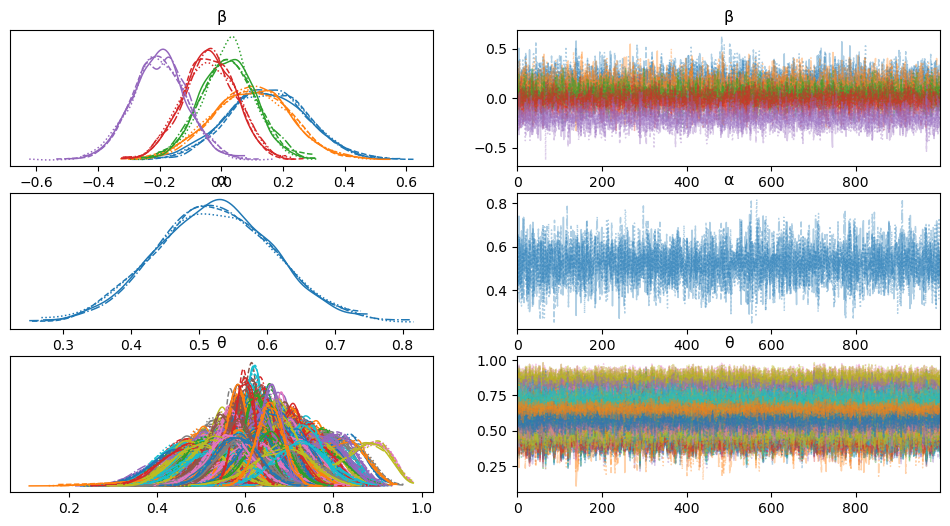

In [17]:
az.summary(trace)
az.plot_trace(trace)

Beta y alpha son hiperparámetros de los cuales asumimos informacion a priori, y estas graficas nos estan diciendo cuales son sus distribuciones reales dado que ya se observaron todos los datos. Theta, son los parámetros importantes del modelo, que utiliza la información de beta y alpha, y nos dice como a lo largo de las simulaciones van cambiando los parámetros, lo que queremos al final es poder observar una convergencia de estos parámetros porque así nos dice que tan bueno es nuestra predicción dado los datos.  

In [18]:
beta_mean = trace.posterior["β"].mean(dim=("chain", "draw")).values
alpha_mean = trace.posterior["α"].mean(dim=("chain", "draw")).values

In [19]:
# Usamos la matriz X de entrada (puede ser todo el dataset o nuevas jugadas)
X_data = features[["mean_speed", "mean_accel", "mean_dir", "x_final", "y_final"]].fillna(0).values

# Calculamos p usando la sigmoide
logits = np.dot(X_data, beta_mean) + alpha_mean
p_cover3 = 1 / (1 + np.exp(-logits))  # Sigmoid

In [20]:
predicted_labels = (p_cover3 > 0.5).astype(int)

In [27]:
features

,gameId,playId,teamAbbr,mean_speed,mean_accel,mean_dir,x_final,y_final,pff_passCoverage,coverage_binary,predicted_coverage,predicted_proba_cover3
0,2022091112,62,GB,1.672500,0.723000,194.457500,34.47,38.17,3,1,0,0.021276
1,2022091112,133,GB,2.181538,1.520769,174.720000,54.23,14.15,1,0,0,0.486849
2,2022091112,157,GB,2.158333,1.618889,158.299444,64.83,32.70,4,1,0,0.010256
3,2022091112,181,GB,1.933478,1.194783,168.698696,78.95,12.83,4,1,0,0.277224
4,2022091112,205,GB,1.616667,1.064444,216.615000,87.44,26.59,1,0,0,0.045364
...,...,...,...,...,...,...,...,...,...,...,...,...
557,2022110603,3689,GB,0.411500,0.323000,171.804167,63.04,16.11,1,0,0,0.224869
558,2022110603,3784,GB,2.468000,0.792000,137.940000,87.90,19.95,3,1,0,0.032487
559,2022110603,3813,GB,1.831818,1.042727,123.691818,92.02,9.12,4,1,0,0.146297
560,2022110603,3835,GB,1.636111,0.973333,130.632222,92.45,32.17,4,1,0,0.001822


In [23]:
print(predicted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 

              precision    recall  f1-score   support

     Cover 1       0.38      0.94      0.54       211
     Cover 3       0.69      0.08      0.15       351

    accuracy                           0.40       562
   macro avg       0.54      0.51      0.34       562
weighted avg       0.57      0.40      0.30       562



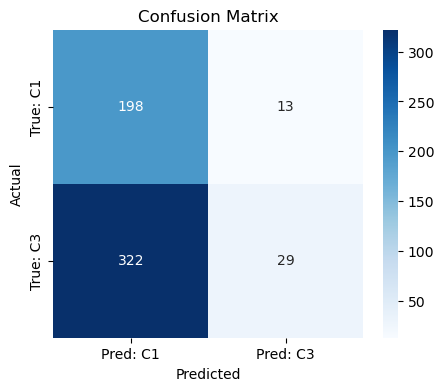

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reales vs predichas
y_true = features["coverage_binary"]
y_pred = features["predicted_coverage"]

# Reporte
print(classification_report(y_true, y_pred, target_names=["Cover 1", "Cover 3"]))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: C1", "Pred: C3"], yticklabels=["True: C1", "True: C3"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
df["coverage_binary"] = df["pff_passCoverage"].apply(lambda x: 0 if x <= 2 else 1)
print(df.shape)
df.head()

(1245783, 14)


,gameId,playId,nflId,teamAbbr,position,frameId,x,y,s,a,dir,event,pff_passCoverage,coverage_binary
0,2022091112,1674,29851.0,GB,QB,1,28.41,29.55,0.0,0.0,272.76,huddle_break_offense,2,0
1,2022091112,1674,29851.0,GB,QB,2,28.41,29.56,0.0,0.0,286.60,NaN,2,0
2,2022091112,1674,29851.0,GB,QB,3,28.41,29.56,0.0,0.0,286.86,NaN,2,0
3,2022091112,1674,29851.0,GB,QB,4,28.41,29.56,0.0,0.0,293.37,NaN,2,0
4,2022091112,1674,29851.0,GB,QB,5,28.41,29.56,0.0,0.0,293.04,NaN,2,0


In [33]:
df['pff_passCoverage'].unique()

array([2, 4, 6, 3, 5, 1, 0])

In [34]:
df_sampled = (
    df.groupby("coverage_binary")
    .apply(lambda x: x.sample(n=5000, random_state=42))
    .reset_index(drop=True)
)
print(df_sampled.shape)
df_sampled.head()

(10000, 14)


,gameId,playId,nflId,teamAbbr,position,frameId,x,y,s,a,dir,event,pff_passCoverage,coverage_binary
0,2022101602,1778,53491.0,GB,C,29,34.88,24.17,0.45,0.39,62.99,NaN,1,0
1,2022101602,2317,52470.0,GB,RB,6,70.15,22.95,0.00,0.00,126.34,NaN,1,0
2,2022110603,1919,41230.0,GB,WR,140,71.14,38.51,2.37,3.45,270.29,NaN,1,0
3,2022110603,1919,54605.0,GB,T,119,98.55,28.31,0.75,3.59,21.59,NaN,1,0
4,2022102306,414,45635.0,GB,TE,91,73.91,17.38,0.00,0.00,90.54,NaN,1,0


In [66]:
df_sampled[df_sampled['coverage_binary']==1].shape

(5000, 14)

In [68]:
df_sampled['coverage_binary'].unique()

array([0, 1], dtype=int64)

In [39]:
def compute_features(group):
    return pd.Series({
        "mean_speed": group["s"].mean(),
        "mean_accel": group["a"].mean(),
        "mean_dir": group["dir"].mean(),
        "x_final": group["x"].iloc[-1],
        "y_final": group["y"].iloc[-1]
    })

In [40]:
# Agrupa por jugada + equipo
features = df_sampled.groupby(["gameId", "playId", "teamAbbr"]).apply(compute_features).reset_index()

# Trae cobertura de referencia por jugada (sin duplicar por jugador)
coverage_labels = df_sampled.groupby(["gameId", "playId"]).first().reset_index()[["gameId", "playId", "pff_passCoverage"]]
features = features.merge(coverage_labels, on=["gameId", "playId"])

# Clasificación binaria: Zone (0-2) = 0, Man (3-6) = 1
features["coverage_binary"] = features["pff_passCoverage"].apply(lambda x: 0 if x <= 2 else 1)

In [41]:
import pymc as pm
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features[["mean_speed", "mean_accel", "mean_dir", "x_final", "y_final"]].fillna(0))
y = features["coverage_binary"].values

with pm.Model() as model:
    X_data = pm.Data("X", X_scaled)
    y_data = pm.Data("y", y)

    # Priors
    β = pm.Normal("β", mu=0, sigma=1, shape=X_scaled.shape[1])
    α = pm.Normal("α", mu=0, sigma=1)

    # Logits
    logits = α + pm.math.dot(X_data, β)
    θ = pm.Deterministic("θ", pm.math.sigmoid(logits))

    # Likelihood
    y_obs = pm.Bernoulli("y_obs", p=θ, observed=y_data)

    # Muestreo
    trace = pm.sample(1000,tune=500,target_accept=0.9,chains=4,cores=4)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 2763 seconds.


In [42]:
import arviz as az
az.summary(trace, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β[0],0.26,0.12,0.03,0.47,0.0,0.0,4839.44,3262.18,1.0
β[1],0.02,0.11,-0.20,0.23,0.0,0.0,4495.09,3157.08,1.0
β[2],-0.09,0.09,-0.26,0.06,0.0,0.0,5663.14,3151.38,1.0
β[3],-0.05,0.09,-0.21,0.12,0.0,0.0,6032.38,2658.57,1.0
β[4],-0.08,0.09,-0.24,0.09,0.0,0.0,6023.88,2980.07,1.0
...,...,...,...,...,...,...,...,...,...
θ[557],0.54,0.05,0.45,0.63,0.0,0.0,5363.48,3003.84,1.0
θ[558],0.51,0.06,0.39,0.63,0.0,0.0,5515.46,3418.62,1.0
θ[559],0.59,0.06,0.48,0.70,0.0,0.0,6063.21,3046.83,1.0
θ[560],0.60,0.04,0.52,0.68,0.0,0.0,5426.54,3418.66,1.0


array([[<Axes: title={'center': 'β'}>, <Axes: title={'center': 'β'}>],
       [<Axes: title={'center': 'α'}>, <Axes: title={'center': 'α'}>],
       [<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>]],
      dtype=object)

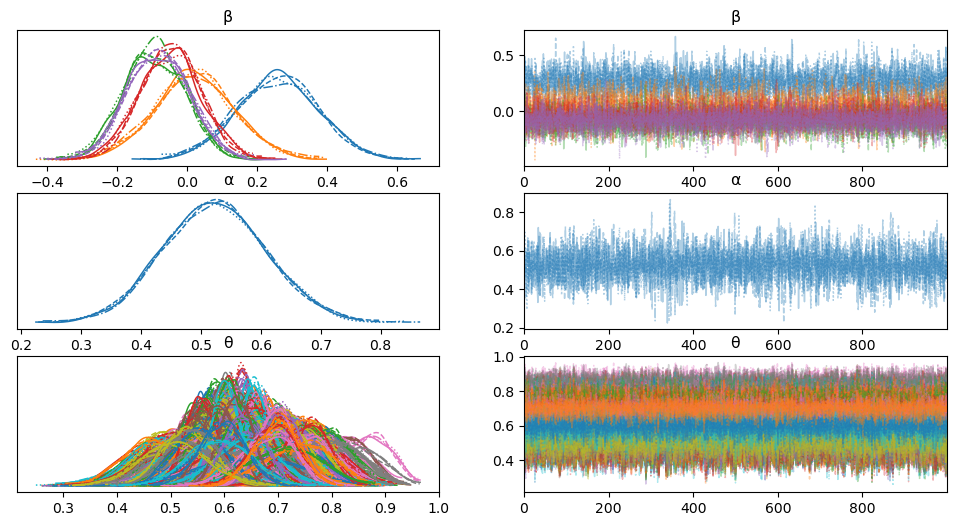

In [43]:
az.plot_trace(trace)

In [44]:
beta_mean = trace.posterior["β"].mean(dim=("chain", "draw")).values
alpha_mean = trace.posterior["α"].mean(dim=("chain", "draw")).values

In [45]:
# Usamos la matriz X de entrada (puede ser todo el dataset o nuevas jugadas)
X_data = features[["mean_speed", "mean_accel", "mean_dir", "x_final", "y_final"]].fillna(0).values

# Calculamos p usando la sigmoide
logits = np.dot(X_data, beta_mean) + alpha_mean
p_cover3 = 1 / (1 + np.exp(-logits))  # Sigmoid

In [46]:
predicted_labels = (p_cover3 > 0.5).astype(int)
print(predicted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [48]:
features["predicted_coverage"] = predicted_labels
features["predicted_proba_cover3"] = p_cover3

In [49]:
features

,gameId,playId,teamAbbr,mean_speed,mean_accel,mean_dir,x_final,y_final,pff_passCoverage,coverage_binary,predicted_coverage,predicted_proba_cover3
0,2022091112,62,GB,0.487000,1.047000,167.688000,32.26,35.71,3,1,0,3.180016e-09
1,2022091112,133,GB,1.073478,0.909130,193.316522,68.36,35.22,1,0,0,6.243609e-11
2,2022091112,157,GB,1.053333,0.885333,173.460667,73.22,29.98,4,1,0,4.912924e-10
3,2022091112,181,GB,1.583077,0.738462,159.143077,79.12,28.78,4,1,0,1.802783e-09
4,2022091112,205,GB,1.366667,0.983333,146.424286,97.08,17.83,1,0,0,5.962023e-09
...,...,...,...,...,...,...,...,...,...,...,...,...
557,2022110603,3689,GB,0.556750,0.318750,176.217375,52.72,23.87,1,0,0,1.438206e-09
558,2022110603,3784,GB,0.295000,0.936667,186.561667,91.50,20.11,3,1,0,1.117692e-10
559,2022110603,3813,GB,1.508750,0.976250,154.495000,98.33,41.32,4,1,0,3.946844e-10
560,2022110603,3835,GB,1.387500,1.280833,216.517500,82.07,22.76,4,1,0,1.121740e-11


C:\Users\jajp2\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jajp2\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jajp2\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Cover 1       0.38      1.00      0.55       211
     Cover 3       0.00      0.00      0.00       351

    accuracy                           0.38       562
   macro avg       0.19      0.50      0.27       562
weighted avg       0.14      0.38      0.20       562



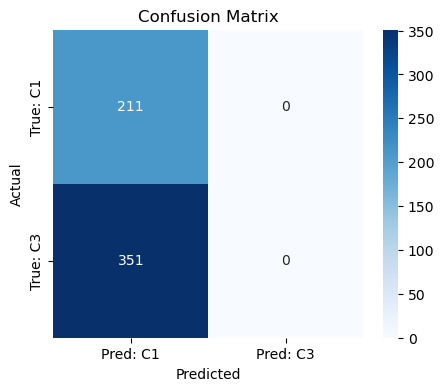

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reales vs predichas
y_true = features["coverage_binary"]
y_pred = features["predicted_coverage"]

# Reporte
print(classification_report(y_true, y_pred, target_names=["Cover 1", "Cover 3"]))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: C1", "Pred: C3"], yticklabels=["True: C1", "True: C3"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

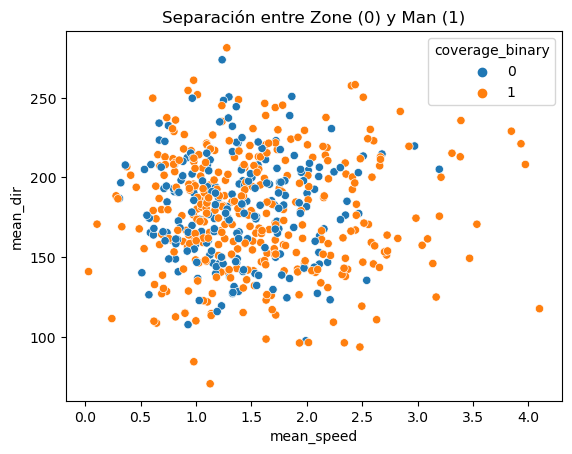

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar dos features para ver si hay separación
sns.scatterplot(data=features, x="mean_speed", y="mean_dir", hue="coverage_binary")
plt.title("Separación entre Zone (0) y Man (1)")
plt.show()

In [55]:
gb_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [56]:
gb_df['offenseFormation'].unique()

array(['EMPTY', 'SINGLEBACK', 'SHOTGUN', 'I_FORM', 'PISTOL'], dtype=object)

In [57]:
gb_df['receiverAlignment'].unique()

array(['4x1', '3x2', '3x1', '2x2', '2x1', '3x3', '1x1'], dtype=object)

In [63]:
drop_cols = [
    'gameId', 'playId', 'playDescription', 'nflId', 'displayName', 
    'frameId', 'jerseyNumber', 'event', 'frameType', 'teamAbbr',
    'pff_runConceptSecondary', 'qbSneak', 'rushLocationType', 
    'pff_primaryDefensiveCoverageMatchupNflId', 'pff_secondaryDefensiveCoverageMatchupNflId'
]
#gb_df = gb_df.drop(columns=drop_cols, inplace=True)
#print(gb_df.shape)
#gb_df.head()

In [62]:
print(gb_df.shape)
gb_df.head()

(1245783, 54)


,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,...,playDirection,x,y,s,a,dis,o,dir,position,pff_defensiveCoverageAssignment
0,2,1,10,GB,MIN,GB,25,00:35,17,0,...,right,28.41,29.55,0.0,0.0,0.0,106.37,272.76,QB,NaN
1,2,1,10,GB,MIN,GB,25,00:35,17,0,...,right,28.41,29.56,0.0,0.0,0.0,106.37,286.60,QB,NaN
2,2,1,10,GB,MIN,GB,25,00:35,17,0,...,right,28.41,29.56,0.0,0.0,0.0,106.37,286.86,QB,NaN
3,2,1,10,GB,MIN,GB,25,00:35,17,0,...,right,28.41,29.56,0.0,0.0,0.0,106.37,293.37,QB,NaN
4,2,1,10,GB,MIN,GB,25,00:35,17,0,...,right,28.41,29.56,0.0,0.0,0.0,106.37,293.04,QB,NaN


In [64]:
gb_df.columns

Index(['quarter', 'down', 'yardsToGo', 'possessionTeam', 'defensiveTeam',
       'yardlineSide', 'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'expectedPoints',
       'offenseFormation', 'receiverAlignment', 'playClockAtSnap',
       'passResult', 'passLength', 'targetX', 'targetY', 'playAction',
       'dropbackType', 'dropbackDistance', 'passLocationType', 'timeToThrow',
       'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'penaltyYards',
       'prePenaltyYardsGained', 'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runPassOption', 'pff_passCoverage',
       'pff_manZone', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'position', 'pf

In [76]:
gb_df['pff_defensiveCoverageAssignment'].unique()

array([nan, 'CFR', 'HCL', 'HOL', 'CFL', 'HCR', 'DF', '4IL', '2L', '3M',
       '2R', 'MAN', '4IR', 'FR', '4OR', 'FL', '3R', '3L', '4OL'],
      dtype=object)

In [71]:
prueba = gb_df.copy()
print(prueba.shape)

(1245783, 54)


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
cat_cols = prueba.select_dtypes(include='object').columns
for col in cat_cols:
    prueba[col] = LabelEncoder().fit_transform(prueba[col].astype(str))

In [74]:
print(prueba.shape)
prueba.head()

(1245783, 54)


,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,...,playDirection,x,y,s,a,dis,o,dir,position,pff_defensiveCoverageAssignment
0,2,1,10,3,4,3,25,18,17,0,...,1,28.41,29.55,0.0,0.0,0.0,106.37,272.76,8,18
1,2,1,10,3,4,3,25,18,17,0,...,1,28.41,29.56,0.0,0.0,0.0,106.37,286.60,8,18
2,2,1,10,3,4,3,25,18,17,0,...,1,28.41,29.56,0.0,0.0,0.0,106.37,286.86,8,18
3,2,1,10,3,4,3,25,18,17,0,...,1,28.41,29.56,0.0,0.0,0.0,106.37,293.37,8,18
4,2,1,10,3,4,3,25,18,17,0,...,1,28.41,29.56,0.0,0.0,0.0,106.37,293.04,8,18


In [77]:
prueba['pff_defensiveCoverageAssignment'].unique()

array([18, 10, 14, 16,  9, 15, 11,  5,  0,  3,  1, 17,  6, 13,  8, 12,  4,
        2,  7])

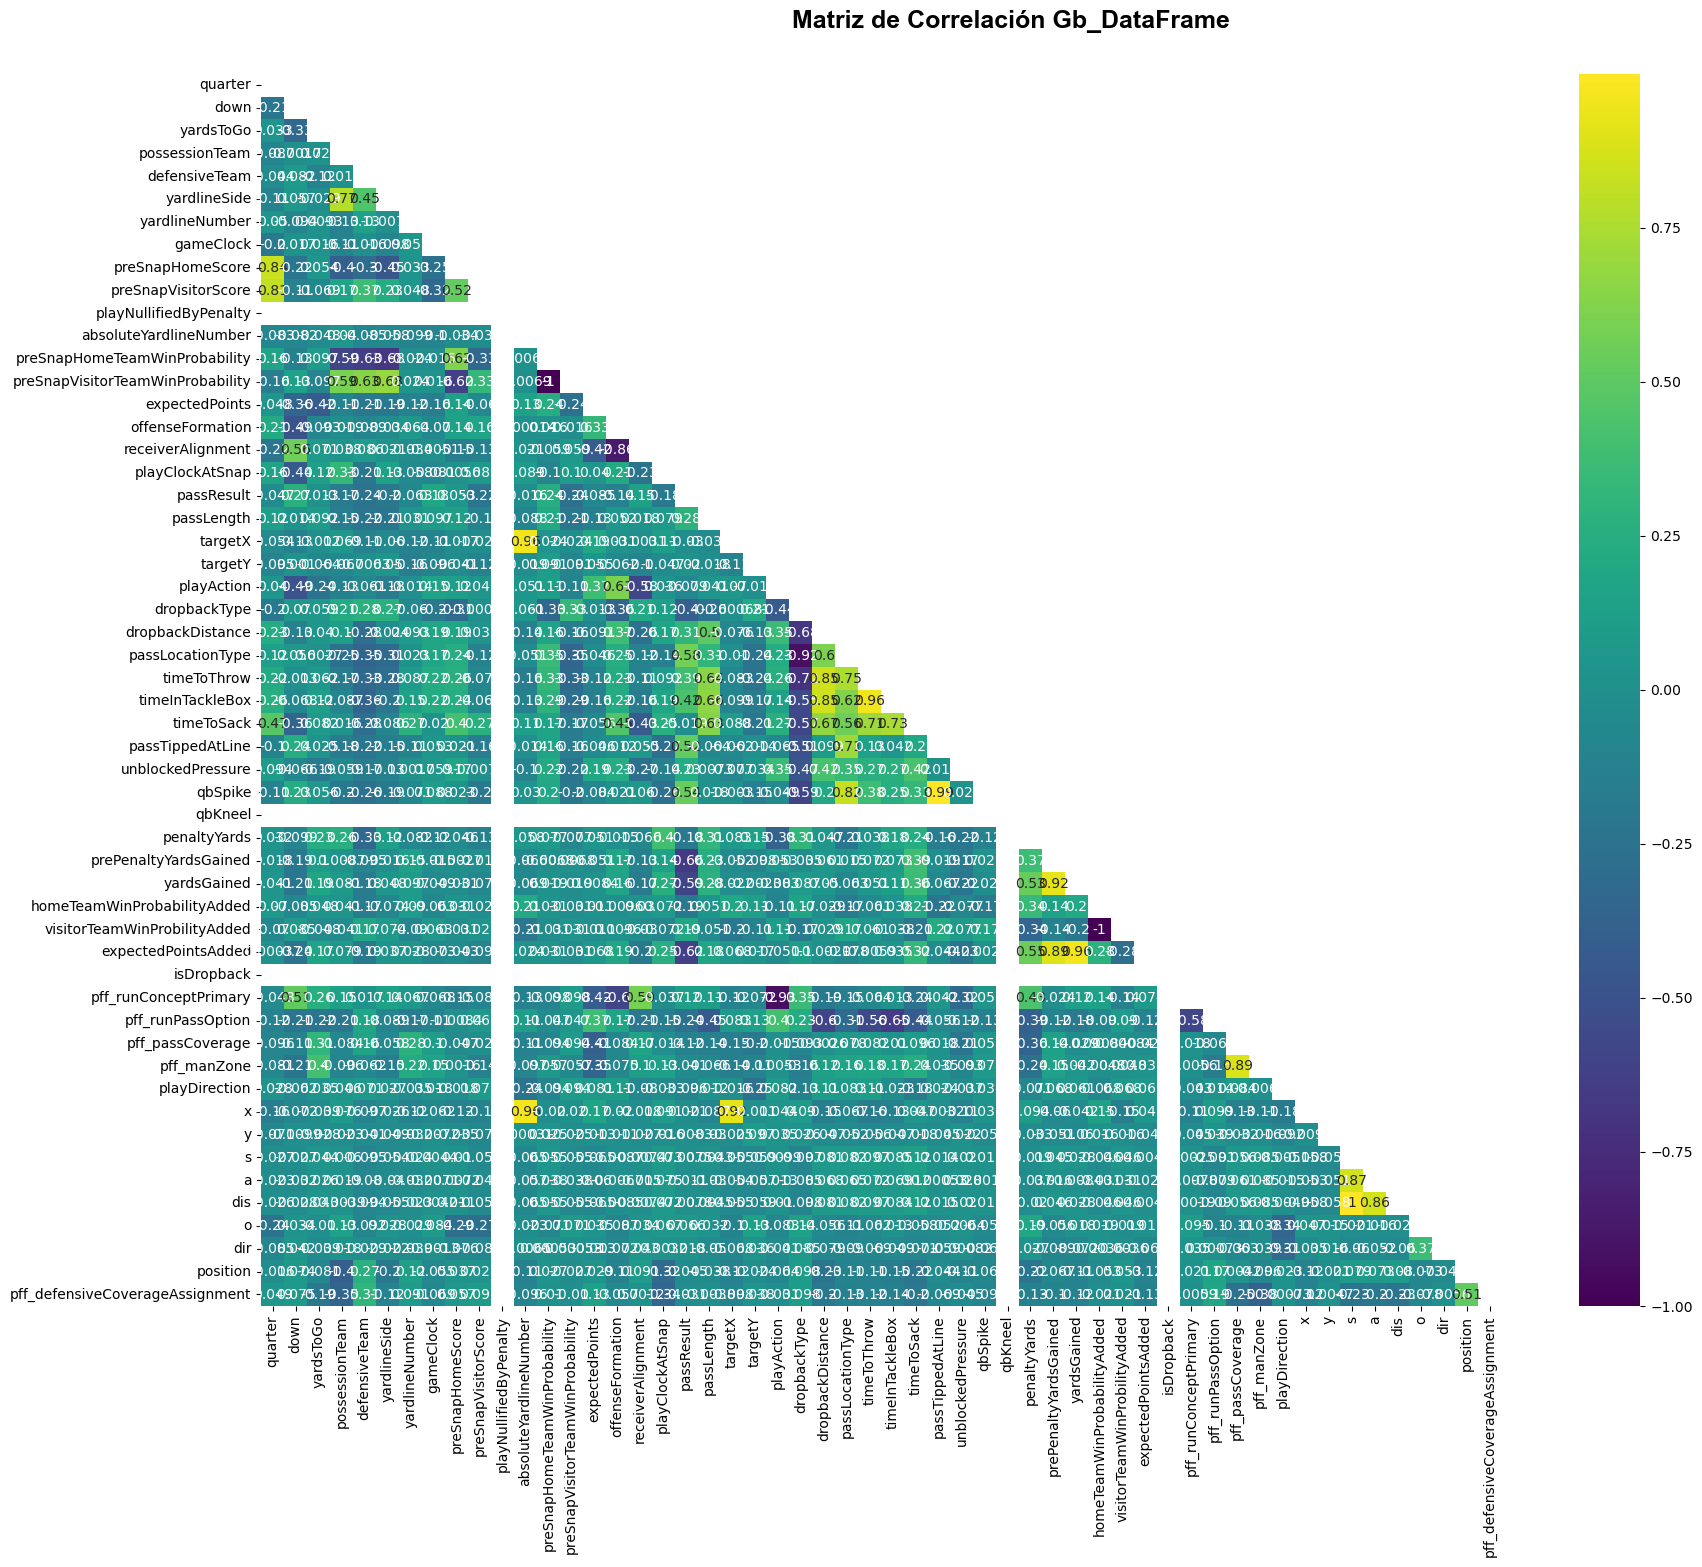

In [79]:
correlacion = prueba.corr()

figsize=(20,16)
        
fig = plt.figure(figsize = figsize)

# Título
plt.suptitle(
    "Matriz de Correlación Gb_DataFrame",
    color='black',
    fontsize=18,
    #loc='center',
    fontweight='bold',
    style='normal',
    family='Arial',
    x = 0.5,
    y=0.92)

# Subtítulo de gráfico

n = ''
#fig.text(0.5, 0.87, nota, ha='center', fontsize=12, style ='italic', family='Arial')

# creating mask
mask = np.triu(np.ones_like(correlacion))

sns.heatmap(correlacion.corr(), annot = True, mask=mask,
            cmap = 'viridis');

#plt.savefig('matriz_correlacion_Husky_1_Ed_A.png')

plt.show()

In [84]:
correlaciones_fuertes = correlacion['pff_passCoverage'][
    (correlacion['pff_passCoverage'].abs() >= 0.5) & 
    (correlacion['pff_passCoverage'].abs() < 1)
].sort_values(ascending=False)

print(correlaciones_fuertes)

pff_manZone     0.661805
penaltyYards   -0.516797
Name: pff_passCoverage, dtype: float64
